# Академия Аналитиков Авито

# Эконометрика

# Домашняя работа №2

## №1 (20 баллов)

- Допустим, у нас есть подобная регрессия (допустим, что мы центрировали переменные):
$
y = \beta_1 \cdot X_1 + \beta_2 \cdot X_2 + u
$
- Однако, наш $X_2$ абсолютно линейно зависит от $X_1$:
$
X_2 = \mu \cdot X_1
$

- Выразите через $X_1$:  
    - $
\sum{X_2^2} = \mu^2\sum{X_1^2}
$
    - $
\sum{X_2 \cdot y} =\mu\sum{X_1 \cdot y}
$
    - $
\sum{X_1 \cdot X_2} = \mu\sum{X_1^2}
$

- А теперь выразите $\beta_2$, зная формулу для нее в случае регрессии с двумя переменными, через $X_1$
$$
\beta_2 = \frac{\sum{X_1 \cdot y} \cdot \sum{X_2^2} - \sum{X_2 \cdot y} \cdot \sum{X_1 \cdot X_2}}{\sum{X_1^2} \cdot \sum{X_2^2} - (\sum{X_1 \cdot X_2})^2} = \frac{0}{0}
$$

- Что вы можете сказать? Что произошло с коэффициентом?

### Из-за абсолютной коллинеарности двух фич коэффициент некорректно определен. Скорре всего на реальных данных не будет абсолютной скореллированости, тогда коэффициент будет принимать неадекватные значения.

### №2 (20 баллов)

- Давайте разберем такой замечательный пример из статьи [Stambaugh (1999)](https://repository.upenn.edu/fnce_papers/367/)
- Суть достаточно простая. Когда мы пытаемся предсказать доходности ценных бумаг (например, акций) с помощью регрессоров, которые весьма постоянны во времени (например, дивидендная доходность, которая редко меняется, т.к. компании редко сильно меняют свою дивидендную политику, чтобы не отпугнуть инвесторов), то мы получаем смещение наших оценок коэффициентов для регрессии доходности
- У нас есть:
$$
r_t = \alpha + x_{t-1} \cdot \beta + \varepsilon_t \\ 
x_t = \theta + x_{t-1} \cdot \gamma + u_t \\ 
\varepsilon_t = \phi \cdot u_t + w_t
$$
Где, $w_t$ независим от $u_t$ и $x_t$, $\gamma \in (0, 1)$
- Нам с вами надо посмотреть, что будет с $\hat{\beta}$
- Для этого надо сначала посчитать:
    - $
\hat{\gamma} 
$  
    - $
\hat{\gamma} - \gamma
$  
    - $
\hat{\beta} 
$
    - $
\hat{\beta} - \beta
$  
- Какой вывод можно сделать? Какие предпосылки вы использовали?

## №3 (60 баллов)

- Давайте вернемся к уже известному датасету с машинами

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import statsmodels.formula.api as smf
import statsmodels.api as sm
sns.set_theme()

- У нас есть следующий датасет
- Нам хочется понять от чего зависит цена на машину
- Сам датасет составлен из стоимости автомобилей и их характеристик в 1978 г.
    - "make" - марка и модель автомобиля
    - "price" - цена
    - "mpg" - пробег
    - "rep78" - кол-во записей о ремонте к 1978 г.
    - "headroom" - габаритная высота
    - "trunk" - размер багажника
    - "weight" - вес
    - "length" - длина
    - "turn" - радиус разворота
    - "displacement" - объем двигателя
    - "gear_ratio" - передаточное число
    - "foreing" - происхождение автомобиля

In [2]:
df_matrix = pd.read_csv('HW_002_001.csv')

In [3]:
df_matrix.head(5)

,make,price,mpg,rep78,headroom,trunk,weight,length,turn,displacement,gear_ratio,foreign
0,AMC Concord,4099,22,3.0,2.5,11,2930,186,40,121,3.58,Domestic
1,AMC Pacer,4749,17,3.0,3.0,11,3350,173,40,258,2.53,Domestic
2,AMC Spirit,3799,22,NaN,3.0,12,2640,168,35,121,3.08,Domestic
3,Buick Century,4816,20,3.0,4.5,16,3250,196,40,196,2.93,Domestic
4,Buick Electra,7827,15,4.0,4.0,20,4080,222,43,350,2.41,Domestic


In [4]:
df_matrix.size

888

- Вы уже пытались построить всякие разные модификации линейной регресии
- Давайте же попробуем сделать опять все то же самое (можете взять ту модель, которую успели сделать на занятии)

In [5]:
# sns.set(rc={'figure.figsize':(9, 6)})
# _ = sns.pairplot(df_matrix, diag_kind='kde', plot_kws={"s": 10})

- У нас есть следующий датасет
- Нам хочется понять от чего зависит цена на машину
- Сам датасет составлен из стоимости автомобилей и их характеристик в 1978 г.
    - "make" - марка и модель автомобиля
    - "price" - цена
    - "mpg" - пробег
    - "rep78" - кол-во записей о ремонте к 1978 г.
    - "headroom" - габаритная высота
    - "trunk" - размер багажника
    - "weight" - вес
    - "length" - длина
    - "turn" - радиус разворота
    - "displacement" - объем двигателя
    - "gear_ratio" - передаточное число
    - "foreing" - происхождение автомобиля

In [6]:
df_matrix['foreign'] = df_matrix['foreign'].map({'Foreign': 1, 'Domestic': 0})

<AxesSubplot:>

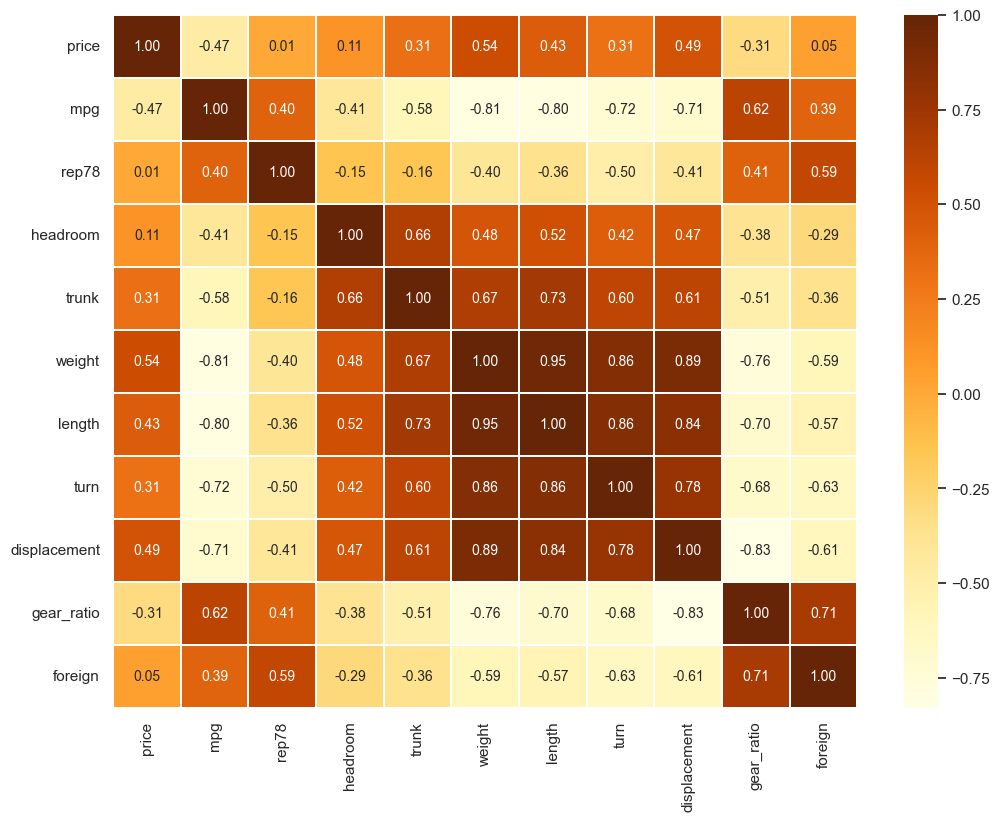

In [7]:
sns.set(rc={'figure.figsize':(12, 9)})
sns.heatmap(df_matrix.corr(), cmap="YlOrBr", linewidths=0.1, annot=True, annot_kws={"fontsize":10}, fmt=".2f")

In [9]:
df_matrix['price'] = np.log1p(df_matrix['price'])

#### Вот такая вот модель

In [10]:
model = smf.ols('price ~ weight + foreign  + displacement', data = df_matrix).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.562
Model:                            OLS   Adj. R-squared:                  0.543
Method:                 Least Squares   F-statistic:                     29.96
Date:                Mon, 20 Mar 2023   Prob (F-statistic):           1.42e-12
Time:                        23:48:36   Log-Likelihood:                -4.6439
No. Observations:                  74   AIC:                             17.29
Df Residuals:                      70   BIC:                             26.50
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        7.1934      0.182     39.628      0.000       6.831       7.555
weight           0.0003   9.01e-05      3.855      0.000       0.000       0.001
foreign          0.5652      0.086      6.572      0.000       0.394       0.737
displacement     0.0012      0.001      1.505      0.137      -0.000       0.003
==============================================================================
Omnibus:                        5.426   Durbin-Watson:                   1.594
Prob(Omnibus):                  0.066   Jarque-Bera (JB):                5.252
Skew:                           0.652   Prob(JB):                       0.0724
Kurtosis:                       2.948   Cond. No.                     1.91e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.91e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

- Расскажите немного, почему вы выбрали именно эти переменные
- Какие зависимости вы ожидали увидеть? Можете подкрепить свои гипотезы графиками
- Как зависимости в итоге увидели? Как вы считаете почему?

#### почему такие фичи

- weight - больше веса, больше металла потрачено на машину -> она дороже 

- foreign - из-за рубежа дороже везти машину -> она дороже 

- displacement - чем больше объем двигателя тем мощнее машина -> она дороже

- mpg - чем больше пробег тем она изношеннее -> она дешевле

- price прологарифмировал потому что были выбросы


- Теперь же давайте посмотрим на данную модель немного скептически
- Вы прошли предпосылки теоремы Г.М. и знаете о том, как тестировать на наличие нарушений этих предпосылок, как исправлять их, если возможно, и какие последствия они могут нести
- Собственно, давайте их и проверим

- Перед тем как бездумно проверять на все подряд, предположите, какие именно предпосылки могут быть нарушение
- Обоснуйте свои предпосылки. Почему вы так считаете? 
- Какие еще графики можно построить, чтобы сделать диагностику модели?
- Можно ли как-то "починить" модель, если было обнаружено нарушение предпосылки теоремы Г.М.? 
- Все ли нарушения предпосылок вы проверили? 

## Предполагаю 

- Должна быть корреляция между весом машины и объемом двигателя, в более тяжелой машине должен стоять двигатель с большим объемом. Из-за этого может появиться коллинеарность 

- Гетероскедастичность проверим тестом


In [11]:
df_matrix[['weight', 'displacement']].corr()

,weight,displacement
weight,1.000000,0.894896
displacement,0.894896,1.000000


### Да, она действительно есть

displacement "понятнее" оставим ее

In [13]:
model = smf.ols('price ~ foreign + displacement + mpg', data = df_matrix).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.501
Model:                            OLS   Adj. R-squared:                  0.480
Method:                 Least Squares   F-statistic:                     23.42
Date:                Mon, 20 Mar 2023   Prob (F-statistic):           1.32e-10
Time:                        23:48:36   Log-Likelihood:                -9.4915
No. Observations:                  74   AIC:                             26.98
Df Residuals:                      70   BIC:                             36.20
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        8.2852      0.274     30.241      0.000       7.739       8.832
foreign          0.5105      0.091      5.589      0.000       0.328       0.693
displacement     0.0029      0.001      4.839      0.000       0.002       0.004
mpg             -0.0171      0.008     -2.107      0.039      -0.033      -0.001
==============================================================================
Omnibus:                        4.576   Durbin-Watson:                   1.745
Prob(Omnibus):                  0.101   Jarque-Bera (JB):                4.412
Skew:                           0.595   Prob(JB):                        0.110
Kurtosis:                       2.885   Cond. No.                     1.83e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.83e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [14]:
sm.stats.diagnostic.het_white(model.resid, sm.add_constant(df_matrix[['foreign', 'displacement', 'mpg']]))

(8.474125744971742, 0.3885770808738974, 1.0507646400858492, 0.4083058134855712)

Как видим Cond. No.	1.83e+03 значит осталась мультиколлинеарность, и к тому же есть гетероскедастичность 

будем приобразовавать переменные 

<AxesSubplot:xlabel='displacement', ylabel='price'>

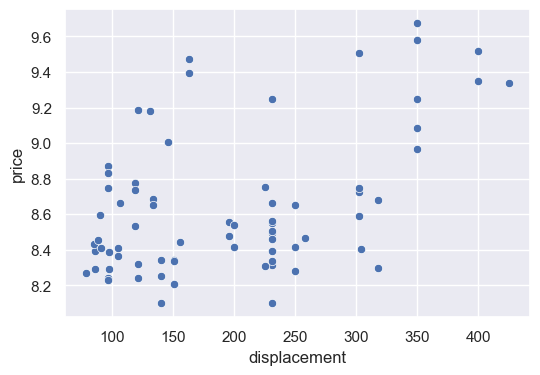

In [20]:
sns.set(rc={'figure.figsize':(6, 4)})
sns.scatterplot(data=df_matrix, x="displacement", y="price")

Похоже, что здесь лучше подойтет аддитивная модель, прологарифмируем displacement

In [23]:
df_matrix['displacement_log'] = np.log1p(df_matrix['displacement'])

<AxesSubplot:xlabel='mpg', ylabel='price'>

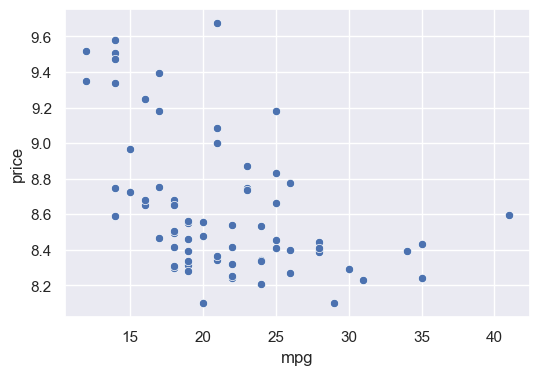

In [22]:
sns.set(rc={'figure.figsize':(6, 4)})
sns.scatterplot(data=df_matrix, x="mpg", y="price")

Такая же гипотеза и о пробеге 


In [26]:
df_matrix['mpg_log'] = np.log1p(df_matrix['mpg'])

<AxesSubplot:xlabel='mpg_log', ylabel='price'>

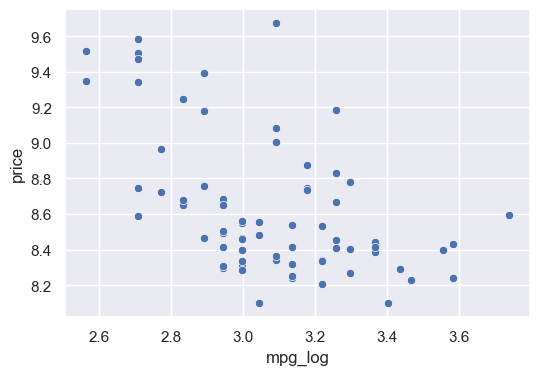

In [29]:
sns.set(rc={'figure.figsize':(6, 4)})
sns.scatterplot(data=df_matrix, x="mpg_log", y="price")

In [27]:
model = smf.ols('price ~ foreign + displacement_log + mpg_log', data = df_matrix).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.469
Model:                            OLS   Adj. R-squared:                  0.446
Method:                 Least Squares   F-statistic:                     20.57
Date:                Tue, 21 Mar 2023   Prob (F-statistic):           1.16e-09
Time:                        00:22:13   Log-Likelihood:                -11.820
No. Observations:                  74   AIC:                             31.64
Df Residuals:                      70   BIC:                             40.86
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept            7.9155      1.399      5.659      0.000       5.126      10.705
foreign              0.4948      0.105      4.734      0.000       0.286       0.703
displacement_log     0.4434      0.149      2.973      0.004       0.146       0.741
mpg_log             -0.5594      0.228     -2.451      0.017      -1.015      -0.104
==============================================================================
Omnibus:                        6.828   Durbin-Watson:                   1.652
Prob(Omnibus):                  0.033   Jarque-Bera (JB):                6.604
Skew:                           0.730   Prob(JB):                       0.0368
Kurtosis:                       3.103   Cond. No.                         257.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [28]:
sm.stats.diagnostic.het_white(model.resid, sm.add_constant(df_matrix[['foreign', 'displacement_log', 'mpg_log']]))

(14.656180744219755,
 0.06618583913651525,
 2.0066364120166846,
 0.059369962606019934)

#### Интерпритация

 - foreign факт того что у нас иномарка добавляет пол процента к цене
 - displacement с увеличением объема двигателя на один процент цена вырастет на 0.35 процента
 - mpg с увиличением пробега на один процент цена падает на 0.55 процента

- Улучшилась ли ваша моделька?
- Как вы считаете, всегда надо "добивать" нарушения предпосылок теорему Г.М.? 
- Что бы вы предпочли, логичную с точки зрения здравого смысла и бизнес сенса модель, но с какими-то нарушениями теоремы Г.М. или же модель, в которой нет нарушений, но при этом совершенно непонятно, почему те или иные переменные в ней оказались? А возможен ли вообще второй случай по вашему мнению?

- Избавились от мультиколлинераности, а с гетероскедастичносью не вышло, $R^2, AIC, BIC$ чуть ухудшились, но зато коэффициенты корректнее специфицированы
- Думаю можно пожертвовать некоторыми предпосылками в угоду интепритируемости
- Выбрал бы первую модель и считаю, что если получаем второй случай, то что-то сильно не понимаем о наших переменных